<a href="https://colab.research.google.com/github/MuhammadHatta72/machine-learning-semester5/blob/main/meet9/Tugas_Meet9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##KELOMPOK 2
###Aido Luthfi Al Hakim (2141720136)
###Evi Amalia Midfia (2141720030)
###Muhammad Hatta (2141720021)
###Tesya Eriana (2141720024)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [3]:
# muat data MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


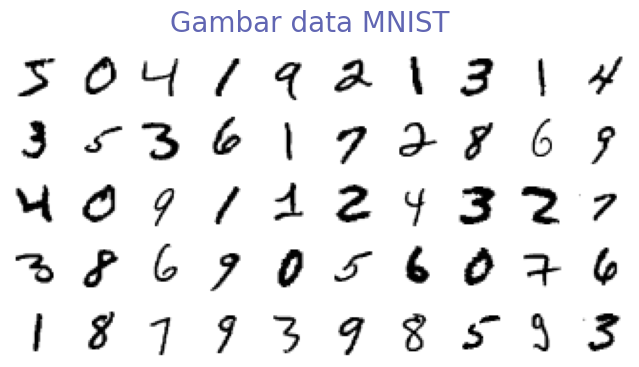

In [4]:
# menampilkan data inputan (hidden input)

fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

In [5]:
# print data dan nilai
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


In [6]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255

# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

# tampilkan hasil setelah diubah bentuk dan skalanya
print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


In [7]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

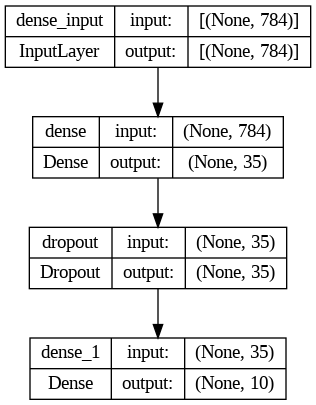

In [8]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)
plot_model(nn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [9]:
# mengonfigurasi bagaimana model neural network (NN) Anda akan melakukan pelatihan
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# pelatihan model neural network (NN) pada data pelatihan
history = nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5159 - accuracy: 0.8457
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3267 - accuracy: 0.9035
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2875 - accuracy: 0.9132
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2647 - accuracy: 0.9199
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2507 - accuracy: 0.9242
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2411 - accuracy: 0.9265
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2283 - accuracy: 0.9295
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2262 - accuracy: 0.9306
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2164 - accuracy: 0.9323
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

Text(0, 0.5, 'Acc')

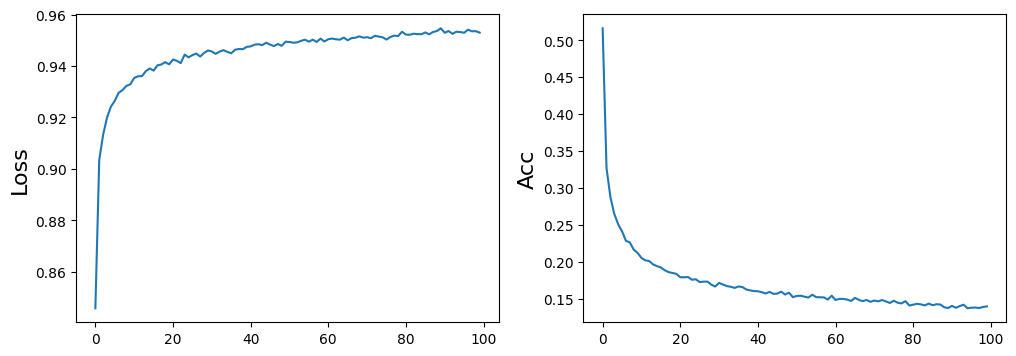

In [11]:
# menggambar dua plot yang menggambarkan perkembangan model Anda selama pelatihan (epoch)
# dalam hal akurasi dan kerugian.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].set_ylabel('Loss', fontsize=16)

ax[1].plot(history.history['loss'])
ax[1].set_ylabel('Acc', fontsize=16)

In [12]:
# menghitung akurasi model pada data pengujian setelah model dilatih
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 1s 2ms/step


0.9621

In [13]:
# menghitung dan menghasilkan matriks kebingungan (confusion matrix) sebagai
# bagian dari evaluasi hasil model klasifikasi
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 963,    0,    4,    1,    2,    4,    1,    2,    2,    1],
       [   0, 1117,    5,    1,    1,    3,    2,    1,    5,    0],
       [   3,    3,  994,    7,    5,    1,    3,    9,    7,    0],
       [   0,    0,    9,  972,    2,   13,    0,    8,    2,    4],
       [   1,    0,    3,    0,  944,    0,    7,    2,    3,   22],
       [   5,    0,    1,   10,    0,  850,    5,    2,   13,    6],
       [  10,    3,    0,    1,    5,   10,  926,    0,    3,    0],
       [   2,    7,   17,    9,    5,    0,    0,  980,    0,    8],
       [   5,    7,    7,    8,    4,   11,    1,    6,  919,    6],
       [   2,    5,    0,    8,   19,    8,    0,    8,    3,  956]])

<Axes: >

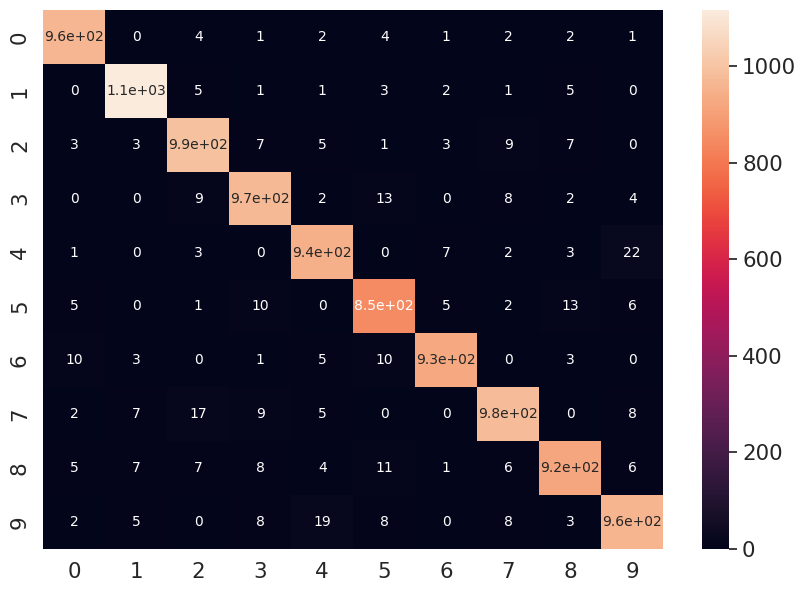

In [14]:
# menggambarkan matriks kebingungan (confusion matrix) dalam bentuk heatmap menggunakan library seaborn.
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

##Model dengan konfigurasi lain

In [15]:
# pra-pemrosesan data pada dataset MNIST sebelum dilakukan pelatihan model
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


In [16]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  0.003921569


In [17]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 35)                27475     
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_3 (Dense)             (None, 21)                756       
                                                                 
 dense_4 (Dense)             (None, 10)                220       
                                                                 
Total params: 28451 (111.14 KB)
Trainable params: 28451 (111.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


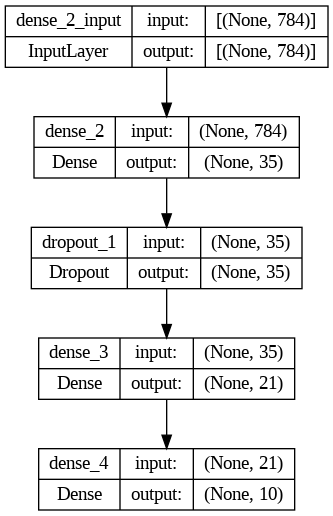

In [18]:
# membuat, merinci, dan memvisualisasikan arsitektur model neural network (NN) dengan Keras
nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

nn_model.summary()

plot_model(nn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [19]:
# mengonfigurasi dan mengkompilasi model neural network sebelum melatihnya.
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# melatih model neural network pada data pelatihan dengan melakukan pelatihan selama 100 epoch (iterasi)
history = nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4888 - accuracy: 0.4809
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8931 - accuracy: 0.6949
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7417 - accuracy: 0.7594
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6710 - accuracy: 0.7874
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6291 - accuracy: 0.8033
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6050 - accuracy: 0.8082
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5767 - accuracy: 0.8181
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5575 - accuracy: 0.8251
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5492 - accuracy: 0.8259
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

Text(0, 0.5, 'Acc')

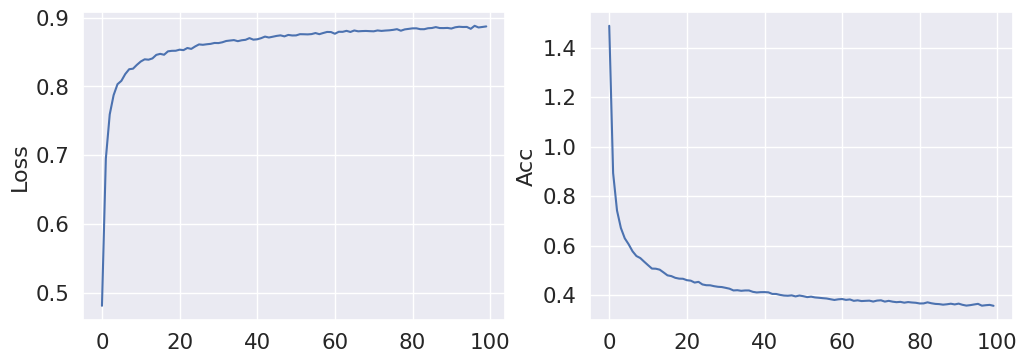

In [21]:
# membuat dua grafik yang menggambarkan perkembangan model Anda selama pelatihan dalam hal akurasi dan kerugian (loss)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].set_ylabel('Loss', fontsize=16)

ax[1].plot(history.history['loss'])
ax[1].set_ylabel('Acc', fontsize=16)

In [22]:
# memprediksi kelas data uji dengan model Anda dan menghitung akurasi prediksi.
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy_score(y_test,y_pred)

313/313 [==============================] - 0s 1ms/step


0.9344

In [23]:
# menghitung dan menghasilkan matriks kebingungan (confusion matrix) sebagai bagian dari evaluasi hasil prediksi model.
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 947,    0,    2,    1,    1,    7,   16,    1,    3,    2],
       [   0, 1115,    4,    3,    1,    2,    4,    0,    6,    0],
       [   7,    7,  961,   10,    8,    2,   12,    9,   15,    1],
       [   4,    8,   22,  922,    1,   30,    0,    9,   11,    3],
       [   1,    1,    3,    0,  929,    0,   12,    1,    3,   32],
       [   8,    1,    2,   27,   10,  789,   15,    1,   27,   12],
       [   3,    3,    3,    0,    5,    8,  934,    0,    2,    0],
       [   3,   21,   18,    3,    6,    0,    0,  931,    1,   45],
       [   2,   15,    2,    9,    9,   24,   14,    2,  878,   19],
       [   5,    7,    0,   10,   25,   13,    3,    4,    4,  938]])

<Axes: >

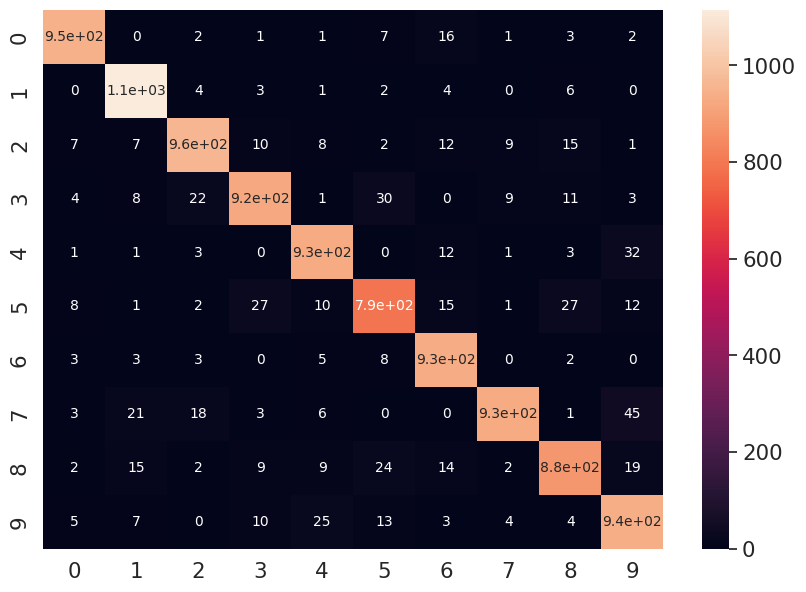

In [24]:
# membuat dan menampilkan matriks kebingungan (confusion matrix) dalam bentuk heatmap menggunakan library seaborn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size